## Libraries

In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from tqdm import tqdm_notebook
from scipy.stats import norm, boxcox

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/water_quality_prediction

/content/gdrive/MyDrive/water_quality_prediction


## Importing Dataset

In [4]:
df = pd.read_csv('water_potability.csv')


# Exploratory Data Analysis

In [5]:
dataset = df.copy()
dataset.head(n = 10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [7]:
dataset.shape

(3276, 10)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
dataset.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

Let's look at the statistics of the dataset

In [ ]:
dataset['Potability']=dataset['Potability'].astype('category')

# **Statistical Analysis**

In [ ]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


There are outliers in the data. We can delete no more than 1-2% of the data, i.e. 30-60 rows.
From the above table, we can see that the count of each feature are not same. so there must me some null values. Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high. However, the above description is for overall population. lets try the same for 2 samples based on Portability feature

Mean and std of almost all features are similar for both samples. there are few differnces in Solids feature. Further analysis using hypothetical testing could help us to identify the significance.

## **Let's check our dataset for duplicates.**

In [9]:
dataset.duplicated().sum()

0

# Preprocessing: Missing Value Problem

# **Null Values**

In [10]:
dataset.isnull().values.any()

True

In [11]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# **Imputing the missing values with the mean**

In [14]:
#################################### Imputing 'ph' value #####################################

phMean_0 = dataset[dataset['Potability'] == 0]['ph'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['ph'].isna()), 'ph'] = phMean_0
phMean_1 = dataset[dataset['Potability'] == 1]['ph'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['ph'].isna()), 'ph'] = phMean_1

##################################### Imputing 'Sulfate' value #####################################

SulfateMean_0 = dataset[dataset['Potability'] == 0]['Sulfate'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = dataset[dataset['Potability'] == 1]['Sulfate'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

################################ Imputing 'Trihalomethanes' value #####################################

TrihalomethanesMean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = dataset[dataset['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [15]:
print('If there is more missing data \n')
dataset.isna().sum()

If there is more missing data 



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Countplot for Potability

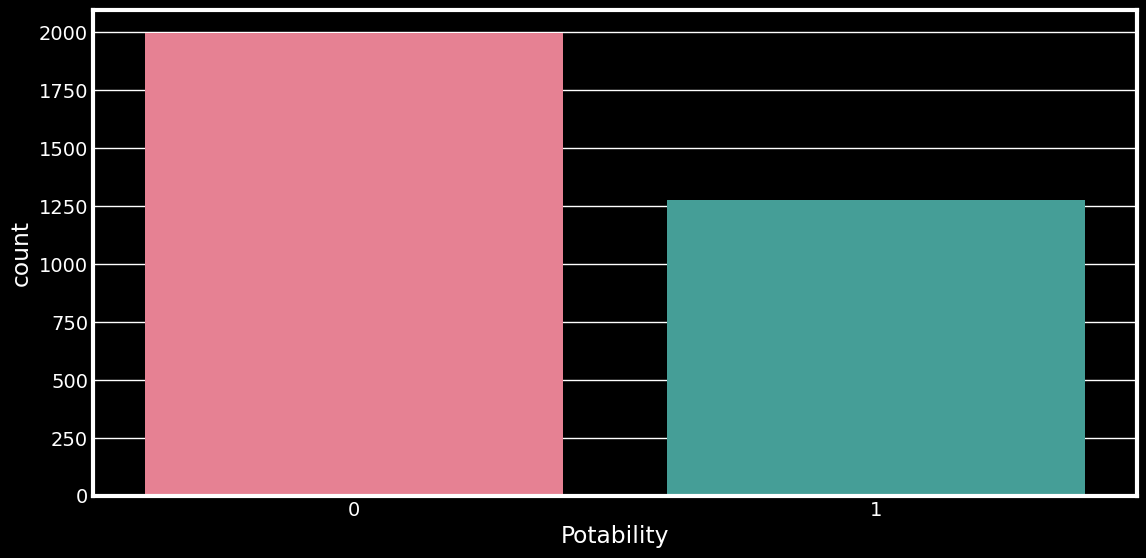

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=dataset, palette='husl');

There is a clear class imbalance.

# **Data Preprocessing**

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter
##################### Preparing the Data for Modelling ######################

X = dataset.drop('Potability', axis = 1).copy()
y = dataset['Potability'].copy()

############################# Train-Test split ############################
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

########################## Synthetic OverSampling ###########################
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y_train)
print('Before SMOTE', counter)
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('\nAfter SMOTE', counter)

################################# Scaling #################################
ssc = StandardScaler()

X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

modelAccuracy = list()

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({0: 1478, 1: 979})

After SMOTE Counter({0: 1478, 1: 1478})


In [ ]:
X_train. shape

(2996, 9)

In [ ]:
y_train.shape

(2996,)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Decision tree Classifier

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       500
           1       0.61      0.70      0.65       319

    accuracy                           0.71       819
   macro avg       0.70      0.71      0.70       819
weighted avg       0.72      0.71      0.71       819

None


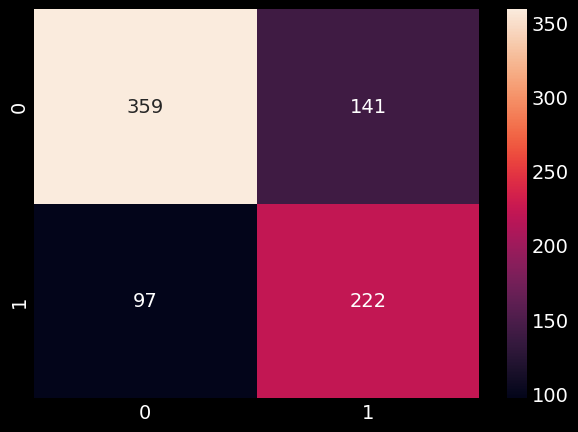

In [ ]:
print('Decision tree Classifier\n')
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_dt = DT.predict(X_test)
print(metrics.classification_report(y_test, y_dt))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_dt)))
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt)
auc_dt = roc_auc_score(y_test, y_dt)

sns.heatmap(confusion_matrix(y_test, y_dt), annot=True, fmt='d')
plt.show()

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       500
           1       0.65      0.74      0.69       319

    accuracy                           0.74       819
   macro avg       0.73      0.74      0.74       819
weighted avg       0.75      0.74      0.75       819

None


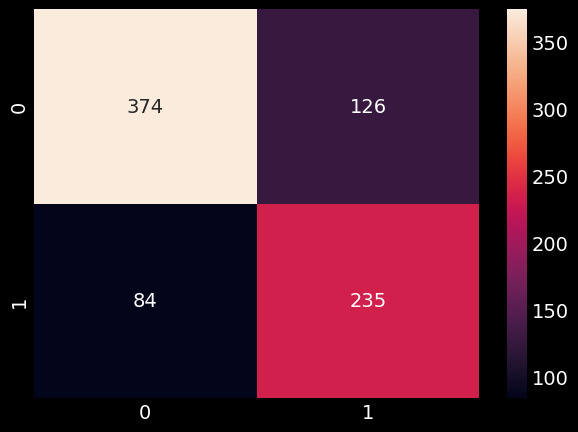

In [ ]:
print('Random Forest Classifier\n')
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

y_Rfc = Rfc.predict(X_test)
print(metrics.classification_report(y_test, y_Rfc))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_Rfc)))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_Rfc)
auc_rf = roc_auc_score(y_test, y_Rfc)
sns.heatmap(confusion_matrix(y_test, y_Rfc), annot=True, fmt='d')
plt.show()

XGB Classifier

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       500
           1       0.64      0.77      0.70       319

    accuracy                           0.74       819
   macro avg       0.73      0.75      0.73       819
weighted avg       0.76      0.74      0.74       819

None


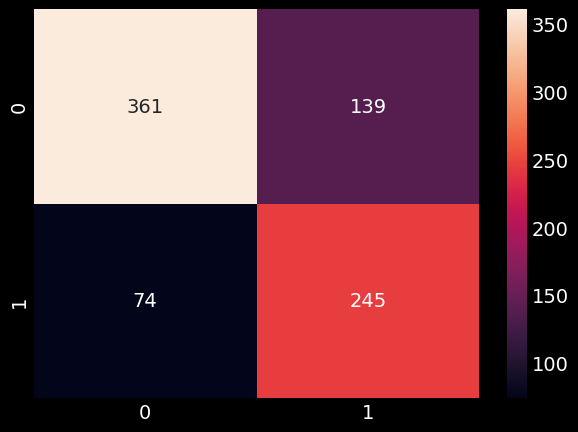

In [ ]:
#################################### XGB Classifier() #######################
print('XGB Classifier\n')
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_xgb = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_xgb))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_xgb)))
fpr_xgb, tpr_xgb, _= roc_curve(y_test, y_xgb)
auc_xgb = roc_auc_score(y_test, y_xgb)
sns.heatmap(confusion_matrix(y_test, y_xgb), annot=True, fmt='d')
plt.show()

Catboost Classifier



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       500
           1       0.66      0.76      0.71       319

    accuracy                           0.75       819
   macro avg       0.74      0.75      0.75       819
weighted avg       0.76      0.75      0.76       819

None


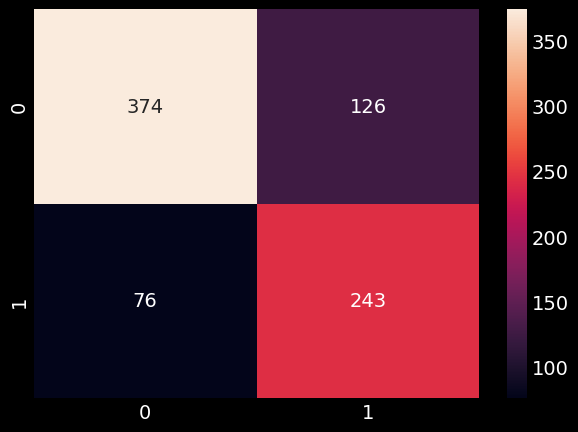

In [ ]:
#################################### catboost Classifier() #######################
print('Catboost Classifier\n')

!pip install catboost
from catboost import CatBoostClassifier
catb = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='Logloss')

# Fit the model
catb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False, plot=True)

y_cat = catb.predict(X_test)
print(metrics.classification_report(y_test, y_cat))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_cat)))
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_cat)
auc_cat = roc_auc_score(y_test, y_cat)
sns.heatmap(confusion_matrix(y_test, y_cat), annot=True, fmt='d')
plt.show()

Adaboost Classifier

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       500
           1       0.59      0.69      0.63       319

    accuracy                           0.69       819
   macro avg       0.68      0.69      0.68       819
weighted avg       0.70      0.69      0.69       819

None


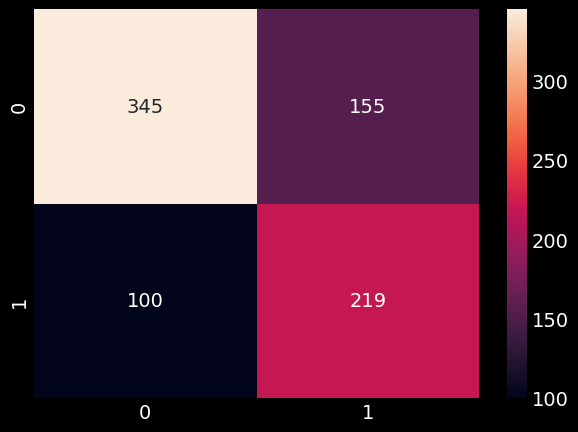

In [ ]:

#################################### Adaboost Classifier() #######################
print('Adaboost Classifier\n')


ada= AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model
ada.fit(X_train, y_train)

y_ada = ada.predict(X_test)
print(metrics.classification_report(y_test, y_ada))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_ada)))
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_ada)
auc_ada = roc_auc_score(y_test, y_ada)
sns.heatmap(confusion_matrix(y_test, y_ada), annot=True, fmt='d')
plt.show()

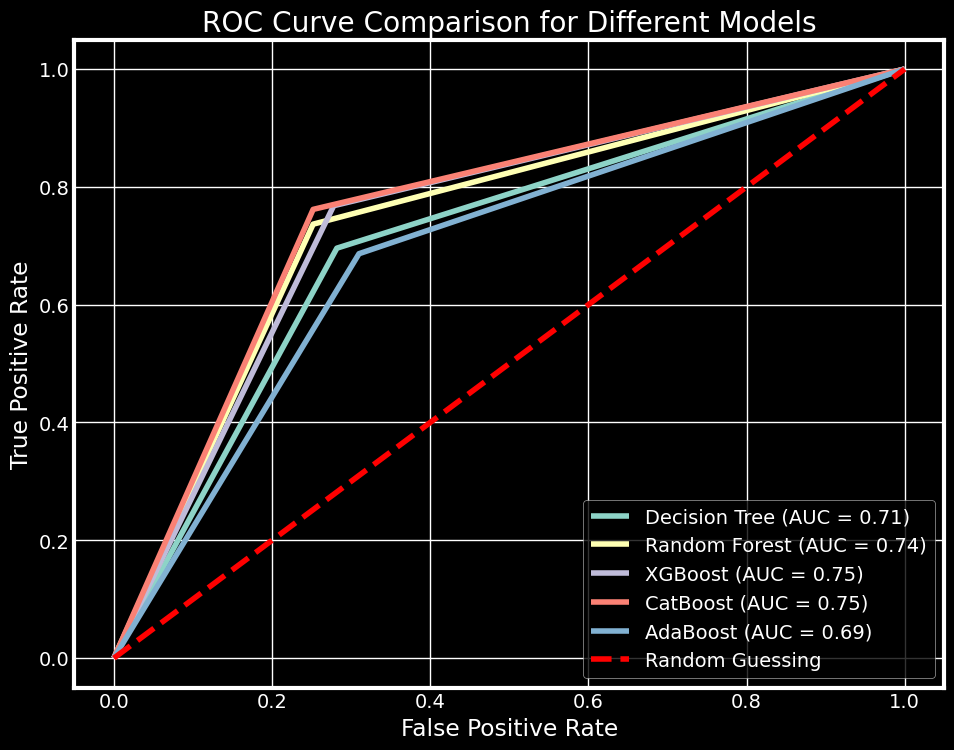

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {auc_cat:.2f})')
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {auc_ada:.2f})')
# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Different Models')
plt.legend(loc='lower right')
plt.show()





